In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the traning file
train = pd.read_csv('./data/train_2.csv').fillna(0)
page = train['Page']
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [3]:
#the Page colum is not neccesary for training the model
train=train.drop('Page',axis=1)
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [16]:
train_row = train.iloc[60282,:].values
X1 = train_row[0:538]
X2 = train_row[1:539]
X3 = train_row[2:540]

y = []
for i in range(3, 12):
    y.append(train_row[i:i+538])

'''y1 = train_row[3:541]
y2 = train_row[4:542]
y3 = train_row[5:543]
y4 = train_row[6:544]
y5 = train_row[7:545]
y6 = train_row[8:546]
y7 = train_row[9:547]
y8 = train_row[10:548]
y9 = train_row[11:549]
y10 = train_row[12:550]'''

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 1))
sc_Y = MinMaxScaler(feature_range=(0, 1))
X_train = np.reshape(X1,(-1,1))
X_train = np.append(X_train, np.reshape(X2,(-1,1)), axis=1)
X_train = np.append(X_train, np.reshape(X3,(-1,1)), axis=1)
X_train = sc_X.fit_transform(X_train)

Y_train = []
for i in range(0,9): 
    y_train = np.reshape(y[i],(-1,1))
    Y_train.append(sc_Y.fit_transform(y_train))

#Reshaping Array
X_train = np.reshape(X_train, (538,3,1))

# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressors = []
for i in range(0,9):
    regressor = Sequential()

    # Adding the input layerand the LSTM layer
    regressor.add(LSTM(units = 24, activation = 'relu', input_shape = (None, 1)))


    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse'])

    # Fitting the RNN to the Training set
    regressor.fit(X_train, Y_train[i], batch_size = 20, epochs = 50, verbose = 0)
    regressors.append(regressor)

125179


'Root Mean Square - Pred 1: 165.11297557222727'

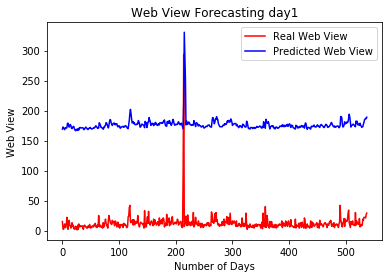

'Root Mean Square - Pred 2: 72.17231146002702'

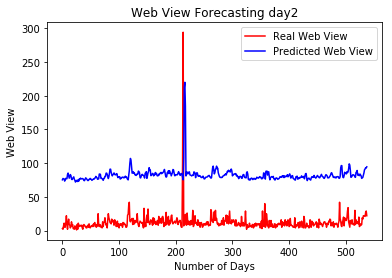

'Root Mean Square - Pred 3: 18.97671874131211'

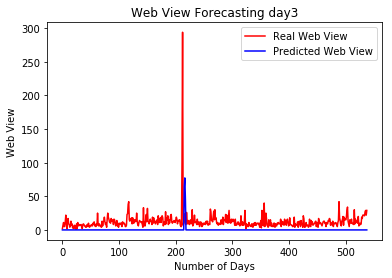

'Root Mean Square - Pred 4: 52.12687010393822'

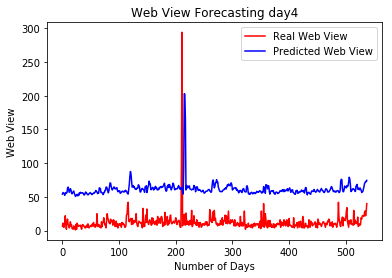

'Root Mean Square - Pred 5: 17.353169014001583'

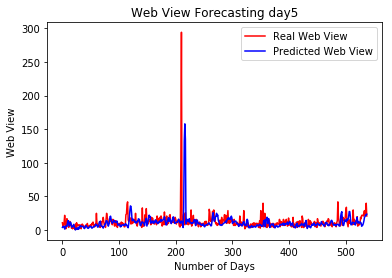

'Root Mean Square - Pred 6: 19.51584816517496'

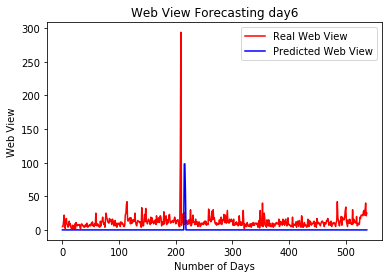

'Root Mean Square - Pred 7: 19.26508797265673'

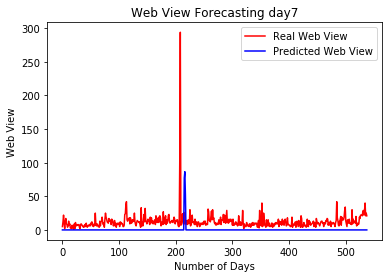

'Root Mean Square - Pred 8: 19.91766351899672'

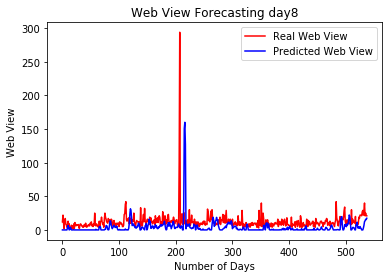

'Root Mean Square - Pred 9: 35.34405760174821'

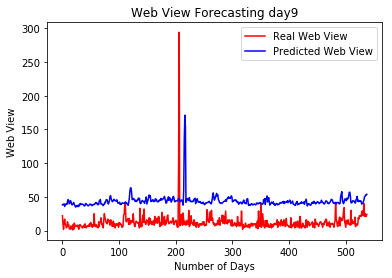

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.display import display
import random

X_value = random.randint(0,train.shape[0])
print(X_value)

def calculateError(y_test, y_pred):
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    return rms

# Getting the predicted Web View
test_row = train.iloc[X_value,:].values
X_test1 = test_row[0:538]
X_test2 = test_row[1:539]
X_test3 = test_row[2:540]

y_test = []
for i in range(3, 12):
    y_test.append(test_row[i:i+538])

inputs = np.reshape(X_test1,(-1,1))
inputs = np.append(inputs, np.reshape(X_test2,(-1,1)), axis=1)
inputs = np.append(inputs, np.reshape(X_test3,(-1,1)), axis=1)    
inputs = sc_X.transform(inputs)
inputs = np.reshape(inputs, (538, 3, 1))

y_pred = []
for i in range(0,9): 
    regressor = regressors[i]
    y_pred = regressor.predict(inputs)
    y_pred = sc_Y.inverse_transform(y_pred)
    y_pred[y_pred < 0] = 0
    y_pred = np.reshape(y_pred, (538,1))
    
    error = calculateError(y_test[i], y_pred)
    
    display("Root Mean Square - Pred " + str(i+1) + ": " + str(error))

    #Visualising Result
    plt.figure
    plt.plot(y_test[i], color = 'red', label = 'Real Web View')
    plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
    #plt.plot(X_test, color = 'green', label = 'Previous values')
    plt.title('Web View Forecasting day' + str(i+1))
    plt.xlabel('Number of Days')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()

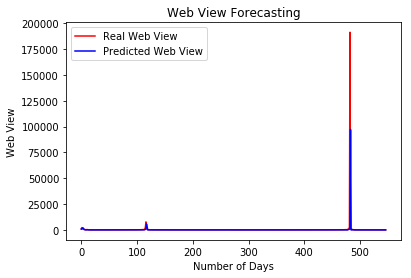

In [20]:
#Training the RNN network on the page 90000
train_row = train.iloc[60282,:].values
X1 = train_row[0:547]
X2 = train_row[1:548]
X3 = train_row[2:549]
y1 = train_row[3:550]
#y2 = train_row[4:549]
#y3 = train_row[5:550]

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = np.reshape(X1,(-1,1))
X_train = np.append(X_train, np.reshape(X2,(-1,1)), axis=1)
X_train = np.append(X_train, np.reshape(X3,(-1,1)), axis=1)
y_train = np.reshape(y1,(-1,1))
#y_train = np.append(y_train, np.reshape(y2,(-1,1)), axis=1)
#y_train = np.append(y_train, np.reshape(y3,(-1,1)), axis=1)
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

#Training LSTM

#Reshaping Array
X_train = np.reshape(X_train, (547,3,1))

# Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layerand the LSTM layer
regressor.add(LSTM(units = 12, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

# Getting the predicted Web View
test_row = train.iloc[10000,:].values
X_test1 = test_row[0:547]
X_test2 = test_row[1:548]
X_test3 = test_row[2:549]
y_test = test_row[3:550]
inputs = X_test1
inputs = np.reshape(inputs,(-1,1))
inputs = np.append(inputs, np.reshape(X_test2,(-1,1)), axis=1)
inputs = np.append(inputs, np.reshape(X_test3,(-1,1)), axis=1)
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (547, 3, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)
y_pred[y_pred < 0] = 0

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days')
plt.ylabel('Web View')
plt.legend()
plt.show()

**Conclusion**
The Reccurant Neural Network using the LSTM layer is able to capture the general trend in the web view traffic of any random page.

In [12]:
# Getting the predicted Web View for page 2400
test_row = train.iloc[2400,:].values
X_test = test_row[0:549]
y_test = test_row[1:550]
inputs = X_test
inputs = np.reshape(inputs,(-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (549, 1, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days')
plt.ylabel('Web View')
plt.legend()
plt.show()

ValueError: non-broadcastable output operand with shape (549,1) doesn't match the broadcast shape (549,3)

60282


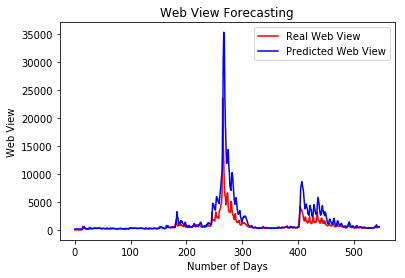

In [32]:
# Getting the Web View for some random page
import random
X_value = random.randint(0,train.shape[0])
print(X_value)
test_row = train.iloc[X_value,:].values
X_test1 = test_row[0:547]
X_test2 = test_row[1:548]
X_test3 = test_row[2:549]
y_test = test_row[3:550]
inputs = X_test1
inputs = np.reshape(inputs,(-1,1))
inputs = np.append(inputs, np.reshape(X_test2,(-1,1)), axis=1)
inputs = np.append(inputs, np.reshape(X_test3,(-1,1)), axis=1)
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (547, 3, 1))
y_pred = regressor.predict(inputs)
y_pred = sc.inverse_transform(y_pred)
y_pred[y_pred < 0] = 0

#Visualising Result
plt.figure
plt.plot(y_test, color = 'red', label = 'Real Web View')
plt.plot(y_pred, color = 'blue', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days')
plt.ylabel('Web View')
plt.legend()
plt.show()


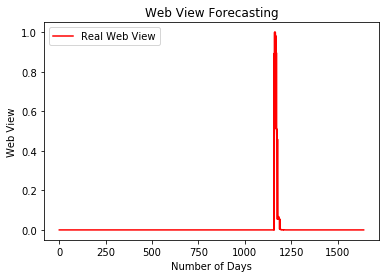

In [20]:
plt.figure
plt.plot(np.reshape(X_train, (-1, 1)), color = 'red', label = 'Real Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [47]:
print(np.reshape(X_train, (-1, 1)))

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.000000